# **MULTI-LABEL EMOTION RECOGNIZATION FROM TEXT**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading the dataset

In [2]:
df =pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/train.txt", sep=';')

In [3]:
df.columns = ["Text", "Emotions"]
print(df.head())

                                                Text Emotions
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness


In [4]:
df['Emotions'].value_counts()

Emotions
joy         5362
sadness     4665
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

<Axes: xlabel='Emotions', ylabel='count'>

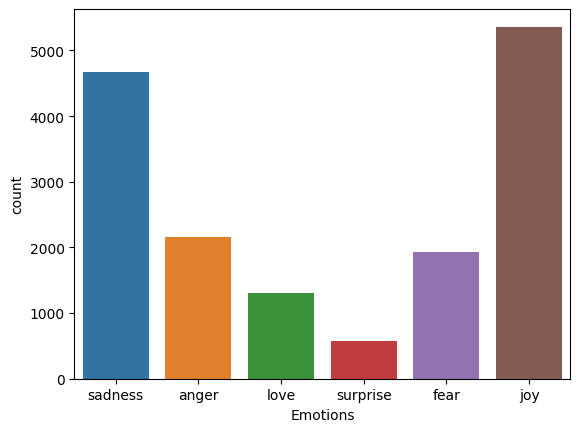

In [5]:
sns.countplot(x='Emotions',data=df)

# **DATA PREPROCESSING**

In [8]:
import re

def remove_userhandles(text):
    return re.sub(r'@\w+', '', text)

df['Clean_Text'] = df['Text'].apply(remove_userhandles)

In [9]:
dir()

['In',
 'Out',
 '_',
 '_4',
 '_5',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'df',
 'dirname',
 'exit',
 'filename',
 'filenames',
 'get_ipython',
 'np',
 'os',
 'pd',
 'quit',
 're',
 'remove_userhandles',
 'sns']

In [10]:
import nltk
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [13]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [14]:
def remove_stopwords(text):
    words = text.split()
    filtered = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered)


In [15]:
df['Clean_Text'] = df['Clean_Text'].apply(remove_stopwords)


In [16]:
df

,Text,Emotions,Clean_Text
0,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
1,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
2,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
3,i am feeling grouchy,anger,feeling grouchy
4,ive been feeling a little burdened lately wasn...,sadness,ive feeling little burdened lately wasnt sure
...,...,...,...
15994,i just had a very brief time in the beanbag an...,sadness,brief time beanbag said anna feel like beaten
15995,i am now turning and i feel pathetic that i am...,sadness,turning feel pathetic still waiting tables sub...
15996,i feel strong and good overall,joy,feel strong good overall
15997,i feel like this was such a rude comment and i...,anger,feel like rude comment im glad


# **Splitting data into input variables and target variable**
x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [18]:
x = df['Clean_Text']
y = df['Emotions']

**Splitting data into train and test set**

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Training the model

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8833333333333333

In [23]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.8766666666666667

# Saving the model

In [24]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()